# Checkpoint 1

\
Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [5]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [6]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [7]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [8]:
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL_ALL_EST                   491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
ENROLL_PREK                      173
ENROLL_KINDER                     83
ENROLL_4                          83
ENROLL_8                          83
ENROLL_12                         83
ENROLL_PRIMARY                   695
ENROLL_HS                        644
ENROLL_ALL                        83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [9]:
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

In [10]:
((df["ENROLL_ALL"]-df["ENROLL_PREK"]-df["ENROLL_KINDER"]-df["ENROLL_PRIMARY"]-df["ENROLL_HS"])/df["ENROLL_ALL"]*100).describe()

count    394.000000
mean       0.420306
std        1.090873
min        0.000000
25%        0.000000
50%        0.000000
75%        0.188212
max        7.702014
dtype: float64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *8th Grade Math Scores*

How many years of data are logged in our dataset? 

In [11]:
df.groupby('YEAR')["AVG_MATH_8_SCORE"].nunique()

YEAR
1990    26
1992    26
1996     1
2000    25
2003    24
2005    24
2007    27
2009    25
2011    23
2013    23
2015    23
2017    26
2019    20
Name: AVG_MATH_8_SCORE, dtype: int64

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [61]:
mfrs = df.groupby(df["STATE"] == ("MICHGIAN" and "OHIO"))
mfrs
mfrs["AVG_MATH_8_SCORE"].mean()

STATE
False    278.20
True     282.25
Name: AVG_MATH_8_SCORE, dtype: float64

Find the average for your outcome score across all states in 2019

In [64]:

df.groupby([df["STATE"], df["YEAR"] == "2019"])["AVG_MATH_8_SCORE"].mean()



STATE                 YEAR 
ALABAMA               False    264.166667
ALASKA                False    280.000000
ARIZONA               False    274.666667
ARKANSAS              False    269.750000
CALIFORNIA            False    269.166667
COLORADO              False    283.181818
CONNECTICUT           False    282.250000
DELAWARE              False    277.181818
DISTRICT_OF_COLUMBIA  False    251.166667
DODEA                 False    287.200000
FLORIDA               False    273.454545
GEORGIA               False    272.833333
HAWAII                False    269.583333
IDAHO                 False    281.833333
ILLINOIS              False    278.909091
INDIANA               False    282.250000
IOWA                  False    283.818182
KANSAS                False    286.100000
KENTUCKY              False    274.333333
LOUISIANA             False    265.500000
MAINE                 False    284.000000
MARYLAND              False    278.916667
MASSACHUSETTS         False    292.363636
MICHIG

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [66]:
mfrs = df.groupby(df["STATE"])
mfrs

In [68]:
mfrs["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [80]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']
df.head()

maxScore = df['AVG_MATH_8_SCORE'].max()
print(maxScore)

minScore = df['AVG_MATH_8_SCORE'].min()
print(minScore)

bottom = maxScore - minScore
print(bottom)


df['AVG_MATH_8_SCORE_SCALING'] =(df['AVG_MATH_8_SCORE'] - minScore) / bottom
df.head()



301.0
231.0
70.0


,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT,AVG_MATH_8_SCORE_SCALING
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,1.004650,0.300000
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,1.496312,0.485714
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,1.095128,0.357143
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,1.621537,0.428571
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,1.691007,0.585714


Feature engineering justification: **<I added the state's expenditure per student price as stated in the instructions because I do believe that is important statistic to be aware of and helps to standardize the different state's population. The AVG_MATH_8_SCORE is written however it can be difficult to see how that really compares to other states. Using normalization techniques, I subtracted the AVG_MATH_8_SCORES with the minimum math 8 score value and divided it by the max - min value of all the avg math 8 scores. This resulted in scaling the math 8 scores in a [0,1] interval to see which states have a higher score than others>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Average Math Scores Scaled')

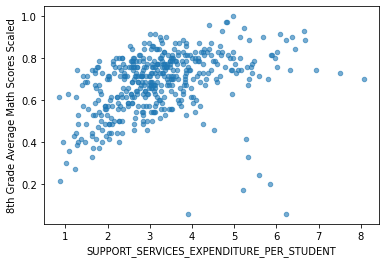

In [85]:
df.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE_SCALING', alpha=0.6)
plt.xlabel('SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT')
plt.ylabel('8th Grade Average Math Scores Scaled')

**<As the ependiture per student increases generally the 8th grade average math scores also increase>**

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

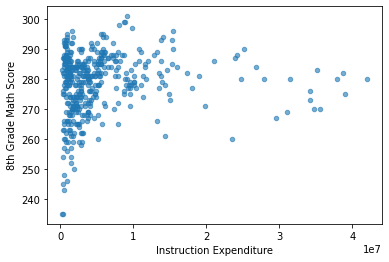

In [86]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure')
plt.ylabel('8th Grade Math Score')

In [219]:
#Instruction Expenditure generally (except for a few outliers) does not impact the 8th grade Math Score

Text(0, 0.5, 'Avg Math 8 Score')

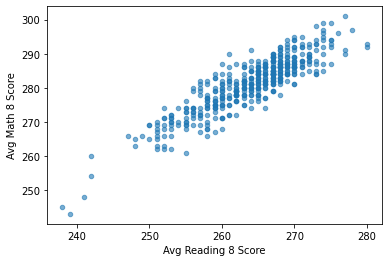

In [87]:
df.plot.scatter(x='AVG_READING_8_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Avg Reading 8 Score')
plt.ylabel('Avg Math 8 Score')

Text(0, 0.5, 'Avg Math 8 Score')

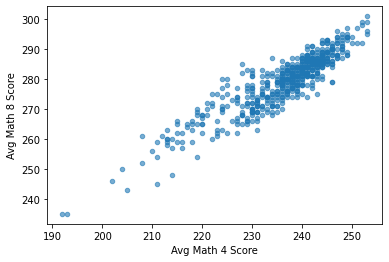

In [88]:
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Avg Math 4 Score')
plt.ylabel('Avg Math 8 Score')

**<Higher Average Math 4 Scores also means higher Average Math 4 score>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
X = df[['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','AVG_MATH_4_SCORE','AVG_READING_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [189]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
y.fillna(y.mean(), inplace=True)

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [191]:
# import your sklearn class here
from sklearn.linear_model import Ridge


In [192]:
# create your model here
model = Ridge()

In [193]:
model.fit(X_train, y_train)

Ridge()

In [194]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [195]:
# You can see the intercepts and coefficients the model generates
print(model.intercept_)
print(model.coef_)

-37.58316314149772
[0.11118026 0.73963888 0.53638941]


In [196]:
# R^2 value describes how well a linear model fits the data
# It ranges between 0 and 1
# There are many caveats to R^2 but it is a good starting point
model.score(X_test, y_test)

0.881802781224027

In [197]:
# mean error
np.mean(model.predict(X_test)-y_test)

-0.19276757933680772

In [198]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

2.1784504583726436

In [199]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

2.78827305915648

In [200]:
#mean squared error
np.mean((model.predict(X_test)-y_test)**2)

7.774466652417835

In [201]:
# used train/test split with RMSE to see which features(Support_services_expenditure_per_student,
#avg math 4 score or avg math 8 score) affect the model

In [ ]:
# These are at the bottom after the graphs and the summary
# It was messing with the graph for some reason

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

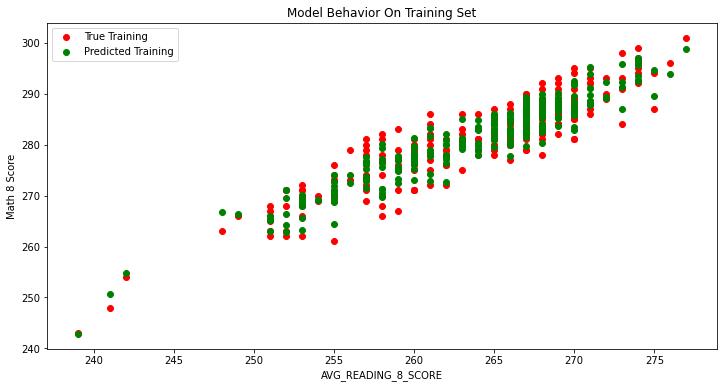

In [205]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

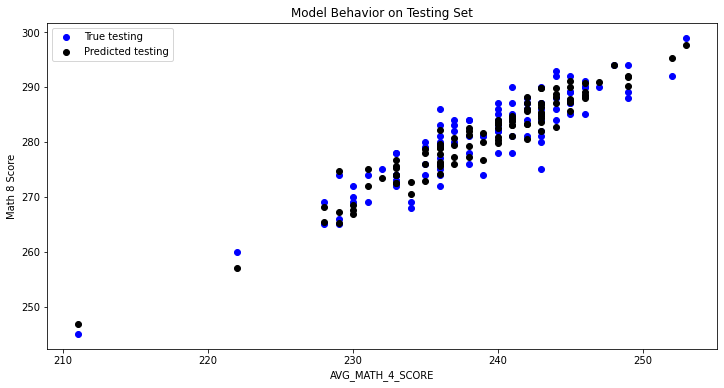

In [207]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior on Testing Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

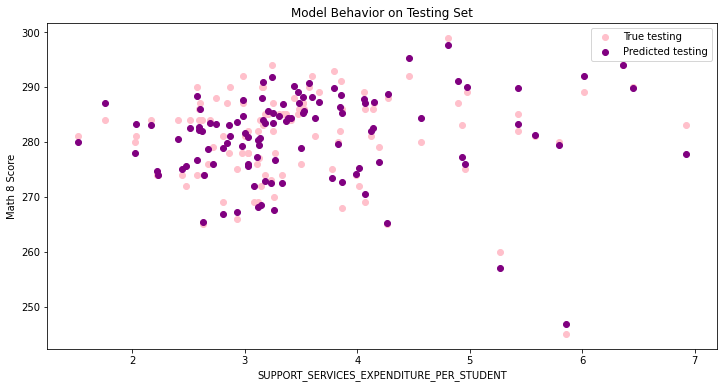

In [209]:
col_name = 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "pink")
plt.scatter(X_test[col_name], model.predict(X_test), color = "purple")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\
I decided to make my test outcome variable Average Math 8 Scores. The Exploratory Data Analysis section really helped me understand what the data meant and the story behind it. After in Feature Engineering through the tutorial and the checkpoint I knew that I was interested in seeing how the expenditure per student impacted the Average Math 8 Score. I also normalized the avg math 8 score to help me really understand what states/years were scoring higher test scores compared to others. Turning that data into a [0,1] interval was very helpful for my own understanding and also visualization. In Visualization, I explored a couple of options that may be interested for my features. I ended up choosing expernditure per student, avg math 4 scores and avg reading 8 scores. I choose the Ridge Regression model because it helped me analyze if my outcome variable was impacted by my features correlated. The Ridge Regression is an extension of linear regression so I hope as I learn more about linear regression I can fully understand the concepts within Ridge. During my evalution along with evaulting the R^2, mean, and mean absolute error, I also tested to see which features impacted the model the most through taking out features and testing the RMSE. When taking out the expenditure by student the RMSE was not impacted, but removing the Math 4 score and reading 8 score increase the RMSE by double. (PLEASE SEE BELOW FOR RMSE VALUES) Looking at the model's predictions and how it differed from the actual data, it worked well with the training set. There could be a problem of overfitting like in the tutorial. Maybe a 60/40 split could fix this problem or recieving more data.   >**

In [210]:
X = df[['AVG_MATH_4_SCORE','AVG_READING_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
model1 = Ridge()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
np.mean((model1.predict(X_test)-y_test)**2)**0.5


2.7066783743482294

In [211]:
X = df[['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','AVG_READING_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
model2 = Ridge()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
np.mean((model2.predict(X_test)-y_test)**2)**0.5


4.034178975243504

In [212]:
X = df[['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','AVG_MATH_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
model3 = Ridge()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
np.mean((model3.predict(X_test)-y_test)**2)**0.5

4.077116944655136